In [11]:
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(".."))


In [12]:
from src.data_loader import load_data
from src.recommender import build_dataset, user_based_cf, item_based_cf
from src.evaluation import evaluate_and_report


In [ ]:
ratings, _, _ = load_data(r'C:\Users\mohr\Desktop\task2305305\data')
ratings.drop_duplicates(subset=['user_id', 'item_id'], keep='last', inplace=True)
ratings.dropna(subset=['user_id', 'item_id', 'rating'], inplace=True)
ratings['user_id'] = pd.to_numeric(ratings['user_id'], errors='coerce')
ratings['item_id'] = pd.to_numeric(ratings['item_id'], errors='coerce')
ratings['rating'] = pd.to_numeric(ratings['rating'], errors='coerce')
ratings.dropna(subset=['user_id', 'item_id', 'rating'], inplace=True)
ratings = ratings[(ratings['rating'] >= 1) & (ratings['rating'] <= 5)]


In [14]:
data = build_dataset(ratings)

In [15]:
print("🔹 User-Based CF Evaluation:")
_, user_predictions = user_based_cf(data, sim_name='cosine', k=40)
user_metrics = evaluate_and_report(user_predictions, k=10, save_path="results/user_based_evaluation.json")

🔹 User-Based CF Evaluation:
Computing the cosine similarity matrix...
Done computing similarity matrix.

🔍 Evaluation Metrics:
RMSE: 1.0223
📌 Average Precision@10: 0.7238
📌 Average Recall@10: 0.5388
📁 Metrics saved to: results/user_based_evaluation.json


In [16]:
print("\n🔸 Item-Based CF Evaluation:")
_, item_predictions = item_based_cf(data, sim_name='cosine', k=40)
item_metrics = evaluate_and_report(item_predictions, k=10, save_path="results/item_based_evaluation.json")


🔸 Item-Based CF Evaluation:
Computing the cosine similarity matrix...
Done computing similarity matrix.

🔍 Evaluation Metrics:
RMSE: 1.0321
📌 Average Precision@10: 0.5694
📌 Average Recall@10: 0.4464
📁 Metrics saved to: results/item_based_evaluation.json


In [17]:
labels = ["RMSE", "Precision@10", "Recall@10"]
user_values = [user_metrics["RMSE"], user_metrics["Precision@10"], user_metrics["Recall@10"]]
item_values = [item_metrics["RMSE"], item_metrics["Precision@10"], item_metrics["Recall@10"]]

In [18]:
df = pd.DataFrame({
    "Metric": labels,
    "User-Based": user_values,
    "Item-Based": item_values
})

In [19]:
df_melted = df.melt(id_vars="Metric", var_name="Model", value_name="Value")

C:\Users\hidoz\AppData\Local\Temp\ipykernel_23328\3076134694.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\hidoz\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


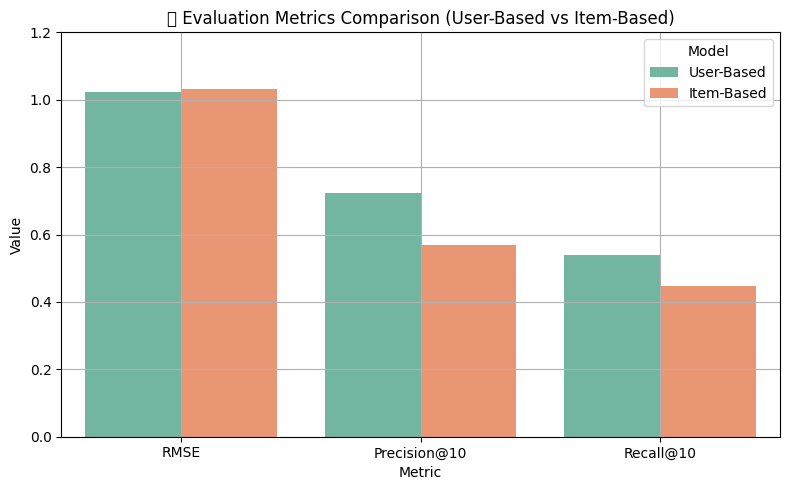

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_melted, x="Metric", y="Value", hue="Model", palette="Set2")
plt.title("📊 Evaluation Metrics Comparison (User-Based vs Item-Based)")
plt.ylim(0, 1.2)
plt.grid(True)
plt.tight_layout()
plt.show()

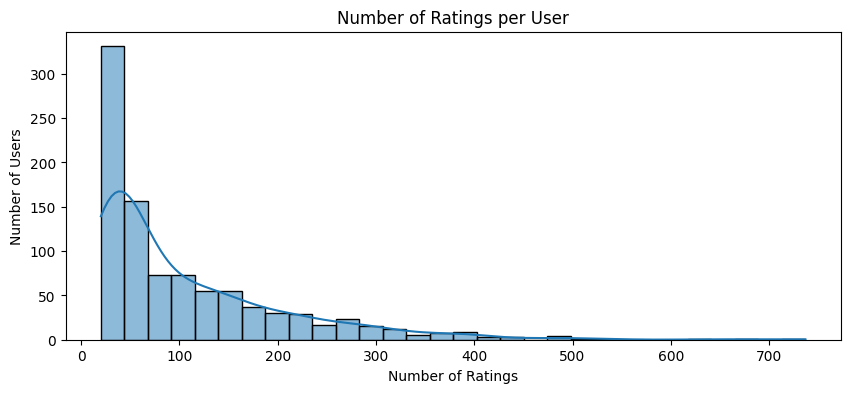

In [21]:
user_counts = ratings.groupby('user_id')['rating'].count()
plt.figure(figsize=(10,4))
sns.histplot(user_counts, bins=30, kde=True)
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

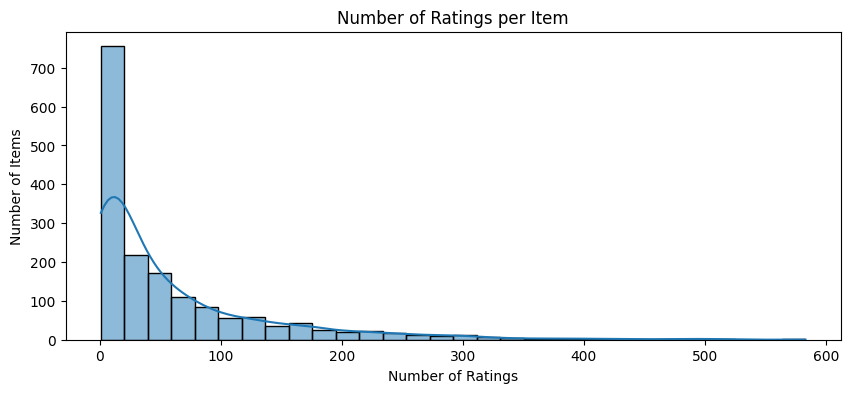

In [22]:
item_counts = ratings.groupby('item_id')['rating'].count()
plt.figure(figsize=(10,4))
sns.histplot(item_counts, bins=30, kde=True)
plt.title("Number of Ratings per Item")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Items")
plt.show()

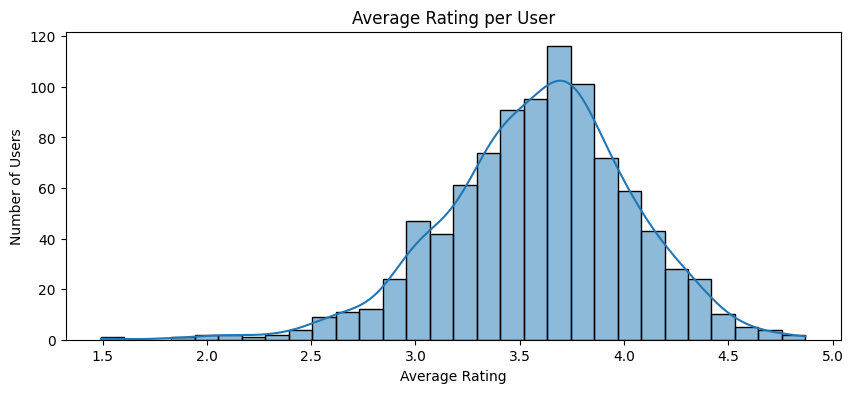

In [23]:
user_avg = ratings.groupby('user_id')['rating'].mean()
plt.figure(figsize=(10,4))
sns.histplot(user_avg, bins=30, kde=True)
plt.title("Average Rating per User")
plt.xlabel("Average Rating")
plt.ylabel("Number of Users")
plt.show()

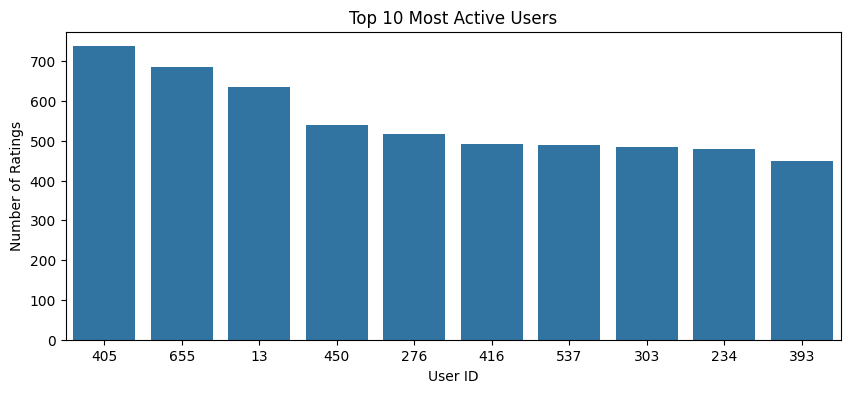

In [24]:
most_active_users = user_counts.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=most_active_users.index.astype(str), y=most_active_users.values)
plt.title("Top 10 Most Active Users")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.show()

In [27]:
user_item_matrix = ratings.pivot_table(index='user_id', columns='item_id', values='rating')

In [30]:
sample_matrix = user_item_matrix.iloc[:30, :30]
sample_matrix_filled = sample_matrix.fillna(0)
sample_matrix_filled = sample_matrix.fillna(0)

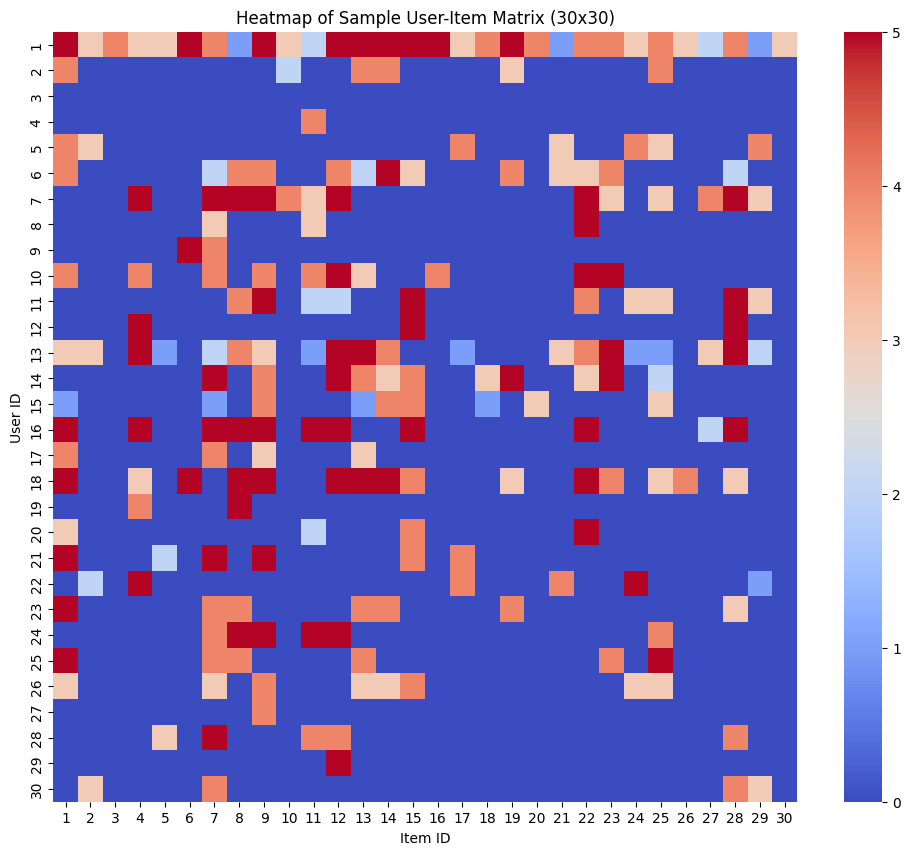

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(sample_matrix_filled, cmap='coolwarm', cbar=True)
plt.title("Heatmap of Sample User-Item Matrix (30x30)")
plt.xlabel("Item ID")
plt.ylabel("User ID")
plt.show()

In [34]:
true_ratings = [true_r for (_, _, true_r, est, _) in user_predictions]
pred_ratings = [est for (_, _, true_r, est, _) in user_predictions]

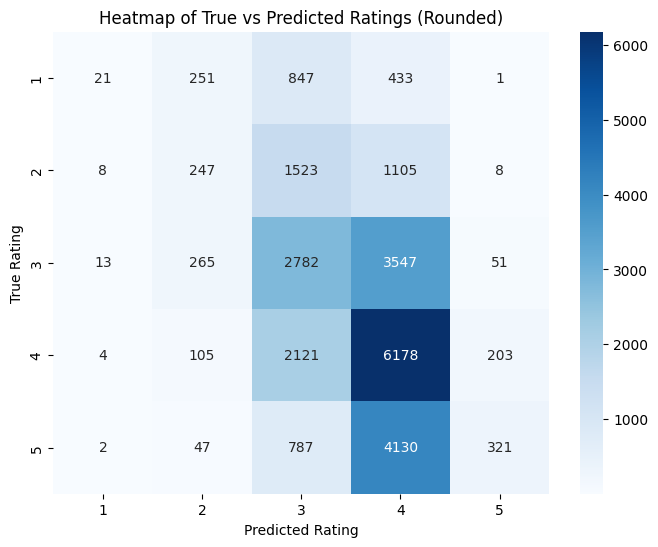

In [35]:
bin_df = pd.DataFrame({"true": true_ratings, "pred": pred_ratings})
binned = bin_df.round().astype(int)
matrix = pd.crosstab(binned["true"], binned["pred"])

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Heatmap of True vs Predicted Ratings (Rounded)")
plt.xlabel("Predicted Rating")
plt.ylabel("True Rating")
plt.show()
